# Global variable for the exxperiment

In [21]:
DATASET_PATH = "/home/pramananda/working_dir/academic/thesis/models/unet/data"
TARGET_PERSON = "raw/BD066-CT3-left-input"
TEST_TRAIN_SPLIT = 0.8
SEED = 42

In [22]:
import pydicom
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
# Load DICOM files
def load_dicom_series(path):
    slices = [pydicom.dcmread(os.path.join(path, s)) for s in os.listdir(path) if s.endswith('.dcm')]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    return np.stack([s.pixel_array for s in slices])

In [24]:
image_dir = os.path.join(DATASET_PATH, TARGET_PERSON)
mask_dir = os.path.join(DATASET_PATH, "mask", TARGET_PERSON.replace("raw/", "").replace("-input", "-seg"))

print(image_dir)
print(mask_dir)

images = load_dicom_series(image_dir)
masks = load_dicom_series(mask_dir)

/home/pramananda/working_dir/academic/thesis/models/unet/data/raw/BD066-CT3-left-input
/home/pramananda/working_dir/academic/thesis/models/unet/data/mask/BD066-CT3-left-seg


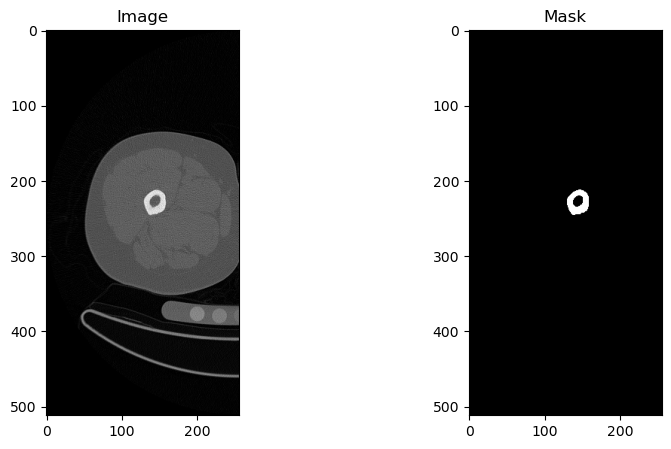

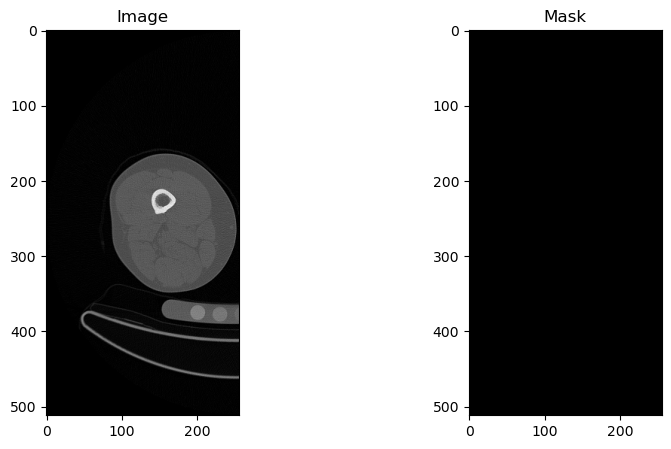

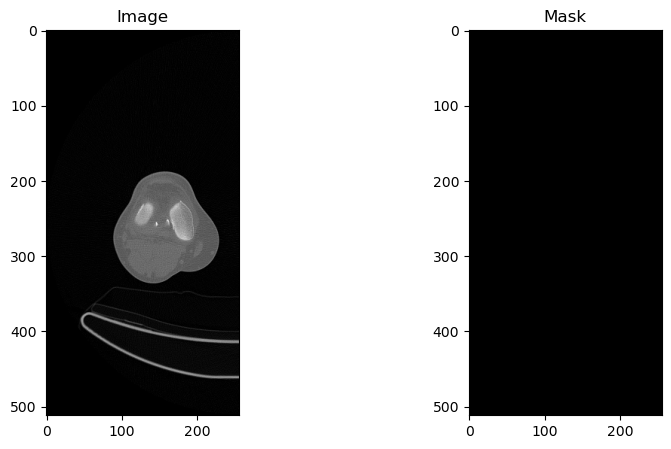

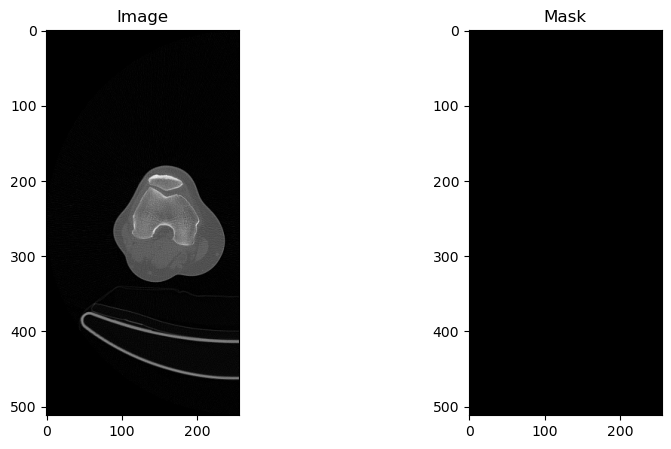

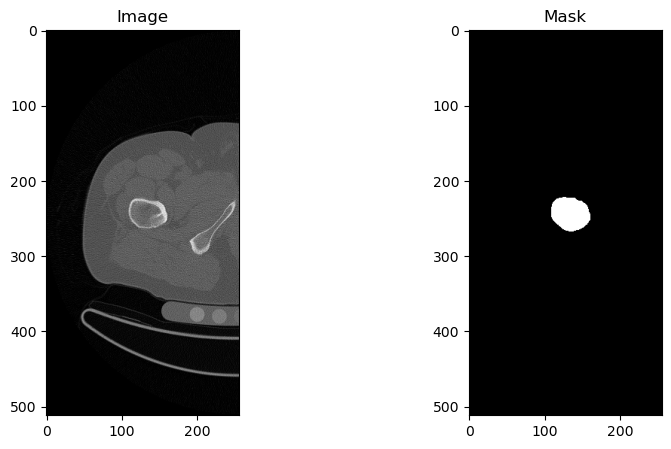

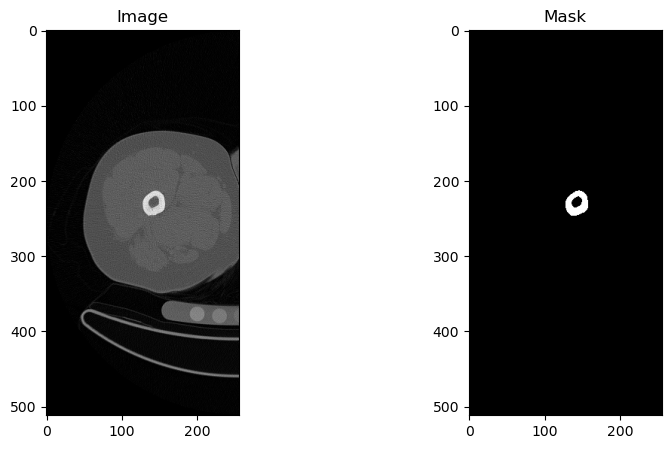

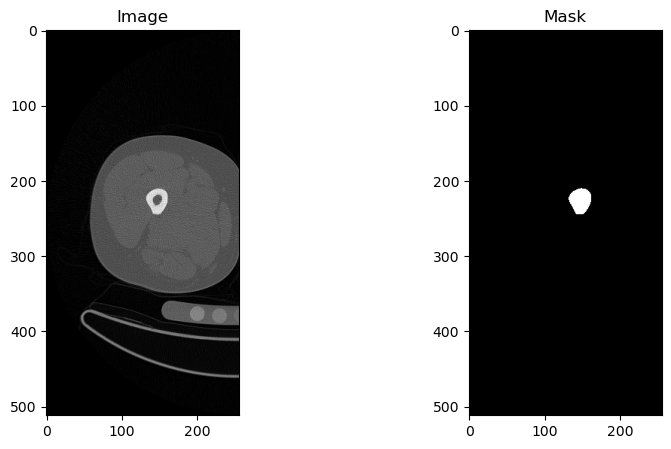

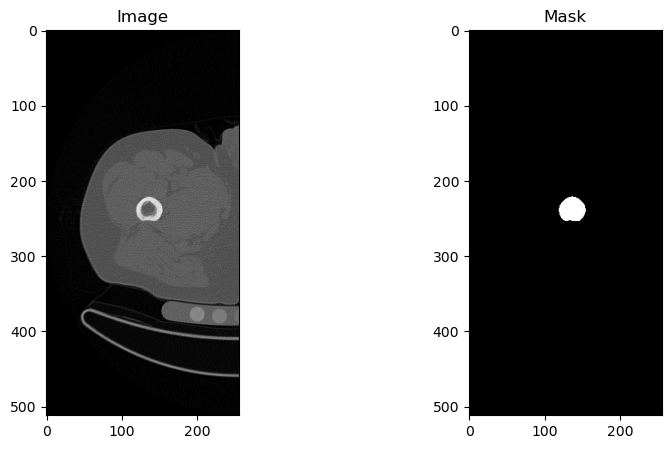

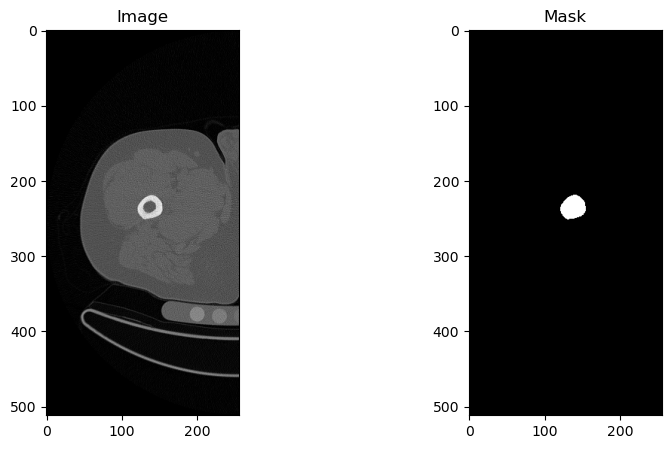

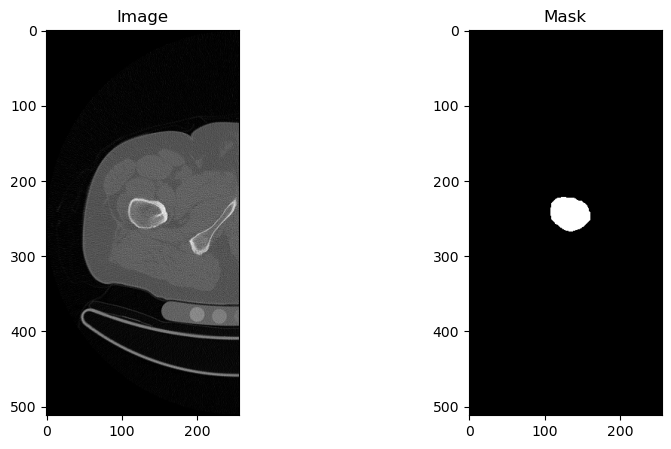

In [19]:
# Randomly select 10 images to display
indices = np.random.choice(images.shape[0], 10, replace=False)
for i in indices:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(images[i], cmap='gray')
    plt.title('Image')
    plt.subplot(122)
    plt.imshow(masks[i], cmap='gray')
    plt.title('Mask')
    plt.show()

In [ ]:
# Save to npy files
np.save(os.path.join(DATASET_PATH, f"{TARGET_PERSON}_images.npy"), images)
np.save(os.path.join(DATASET_PATH, f"{TARGET_PERSON}_masks.npy"), masks)

In [25]:
# Get all person directories
raw_dir = os.path.join(DATASET_PATH, "raw")
mask_dir = os.path.join(DATASET_PATH, "mask")
person_dirs = [d for d in os.listdir(raw_dir) if os.path.isdir(os.path.join(raw_dir, d))] 

print(person_dirs)

['AB029-CT3-right-input', 'BD066-CT3-left-input', 'BH034-CT3-right-input', 'BD066-CT3-right-input', 'AC050-CT3-right-input', 'AB029-CT3-left-input', 'BP004-CT3-left-input', 'BH034-CT3-left-input']


In [26]:
# Load all images and masks person-wise
all_images = {}
all_masks = {}
for person in person_dirs:
    image_path = os.path.join(raw_dir, person)
    mask_path = os.path.join(mask_dir, person.replace("-input", "-seg"))
    all_images[person] = load_dicom_series(image_path)
    all_masks[person] = load_dicom_series(mask_path)

In [27]:
# Split persons into train and test sets
train_persons, test_persons = train_test_split(person_dirs, train_size=TEST_TRAIN_SPLIT, random_state=SEED)

In [28]:
# Create train and test datasets
train_images = np.concatenate([all_images[p] for p in train_persons])
train_masks = np.concatenate([all_masks[p] for p in train_persons])
test_images = np.concatenate([all_images[p] for p in test_persons])
test_masks = np.concatenate([all_masks[p] for p in test_persons])

In [29]:
# Save to npy files
np.save(os.path.join(DATASET_PATH, "train_images.npy"), train_images)
np.save(os.path.join(DATASET_PATH, "train_masks.npy"), train_masks)
np.save(os.path.join(DATASET_PATH, "test_images.npy"), test_images)
np.save(os.path.join(DATASET_PATH, "test_masks.npy"), test_masks)